In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

#### Norman19

In [2]:
adata = sc.read_h5ad("result/norman19_viability.h5ad")
adata

AnnData object with n_obs × n_vars = 111445 × 33694
    obs: 'guide_id', 'read_count', 'UMI_count', 'coverage', 'gemgroup', 'good_coverage', 'number_of_cells', 'tissue_type', 'cell_line', 'cancer', 'disease', 'perturbation_type', 'celltype', 'organism', 'perturbation', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'viability'
    var: 'ensemble_id', 'ncounts', 'ncells'
    uns: 'log1p'

In [3]:
print(adata.obs["perturbation"].to_list()[:10])
print(adata.obs["guide_id"].to_list()[:10])

['ARID1A', 'BCORL1', 'FOSB', 'SET_KLF1', 'OSR2', 'KLF1_BAK1', 'FOXA3_FOXL2', 'TP73', 'HES7', 'IRF1_SET']
['ARID1A_NegCtrl0;ARID1A_NegCtrl0', 'BCORL1_NegCtrl0;BCORL1_NegCtrl0', 'FOSB_NegCtrl0;FOSB_NegCtrl0', 'SET_KLF1;SET_KLF1', 'OSR2_NegCtrl0;OSR2_NegCtrl0', 'KLF1_BAK1;KLF1_BAK1', 'FOXA3_FOXL2;FOXA3_FOXL2', 'TP73_NegCtrl0;TP73_NegCtrl0', 'HES7_NegCtrl0;HES7_NegCtrl0', 'IRF1_SET;IRF1_SET']


In [4]:
df_perturb_viab = pd.DataFrame({"guide_id":adata.obs["guide_id"].to_list(), "perturbation":adata.obs["perturbation"].to_list(), "viability":adata.obs["viability"]})
df_perturb_viab.head()

,guide_id,perturbation,viability
TTGAACGAGACTCGGA,ARID1A_NegCtrl0;ARID1A_NegCtrl0,ARID1A,-0.208360
CGTTGGGGTGTTTGTG,BCORL1_NegCtrl0;BCORL1_NegCtrl0,BCORL1,-0.294830
GAACCTAAGTGTTAGA,FOSB_NegCtrl0;FOSB_NegCtrl0,FOSB,0.135545
CCTTCCCTCCGTCATC,SET_KLF1;SET_KLF1,SET_KLF1,-0.317036
TCAATCTGTCTTTCAT,OSR2_NegCtrl0;OSR2_NegCtrl0,OSR2,-0.131222


In [5]:
print(df_perturb_viab.shape)

(111445, 3)


In [7]:
df_perturb_viab = df_perturb_viab.loc[df_perturb_viab["guide_id"] != "NegCtrl1_NegCtrl0;NegCtrl1_NegCtrl0"]
print(df_perturb_viab.shape)

(108497, 3)


In [10]:
df_perturb_viab["guide_id"] = [x.split(";")[0] for x in df_perturb_viab["guide_id"]]
print(df_perturb_viab["guide_id"][:5])

TTGAACGAGACTCGGA    ARID1A_NegCtrl0
CGTTGGGGTGTTTGTG    BCORL1_NegCtrl0
GAACCTAAGTGTTAGA      FOSB_NegCtrl0
CCTTCCCTCCGTCATC           SET_KLF1
TCAATCTGTCTTTCAT      OSR2_NegCtrl0
Name: guide_id, dtype: object


In [13]:
df_growth = pd.read_excel("data/aax4438_tables3.xlsx")
df_growth.head()

,Unnamed: 0,barcode sequencing,Unnamed: 2,Unnamed: 3,Unnamed: 4,sgRNA sequencing,Unnamed: 6,Unnamed: 7,Unnamed: 8,triple sequencing,Unnamed: 10,Unnamed: 11,Unnamed: 12,triple sequencing.1,Unnamed: 14,Unnamed: 15
0,NaN,endpoint,endpoint,T0,T0,endpoint,endpoint,T0,T0,endpoint,endpoint,T0,T0,phenotype,phenotype,phenotype
1,NaN,Rep1,Rep2,Rep1,Rep2,Rep1,Rep2,Rep1,Rep2,Rep1,Rep2,Rep1,Rep2,Rep1,Rep2,Replicate average
2,AHR_-_17338164.23-P1P2++AHR_-_17338164.23-P1P2,90,42,367,433,56,29,372,487,37,21,229,305,-0.470701,-0.532444,-0.501573
3,AHR_-_17338164.23-P1P2++AHR_-_17338168.23-P1P2,230,164,598,619,293,167,804,846,215,87,524,519,-0.334627,-0.424563,-0.379595
4,AHR_-_17338164.23-P1P2++ARID1A_+_27022167.23-P1P2,88,120,430,581,64,109,481,683,48,60,300,420,-0.479597,-0.445195,-0.462396


In [14]:
guide_id = df_growth["Unnamed: 0"][2:]
df_growth_subset = df_growth[["Unnamed: 0","Unnamed: 15"]]
df_growth_subset.columns = ["guide_id", "growth_phenotype"]
df_growth_subset = df_growth_subset.iloc[2:]
df_growth_subset.head()

,guide_id,growth_phenotype
2,AHR_-_17338164.23-P1P2++AHR_-_17338164.23-P1P2,-0.501573
3,AHR_-_17338164.23-P1P2++AHR_-_17338168.23-P1P2,-0.379595
4,AHR_-_17338164.23-P1P2++ARID1A_+_27022167.23-P1P2,-0.462396
5,AHR_-_17338164.23-P1P2++ARID1A_-_27022243.23-P1P2,-0.577289
6,AHR_-_17338164.23-P1P2++ARRDC3_+_90679525.23-P1P2,-0.405569


In [15]:
print(df_growth_subset["guide_id"][-5:])

57118    negative_control_9++negative_control_5
57119    negative_control_9++negative_control_6
57120    negative_control_9++negative_control_7
57121    negative_control_9++negative_control_8
57122    negative_control_9++negative_control_9
Name: guide_id, dtype: object


In [16]:
def transform_guideid(guide_id):
    g = guide_id
    target_1 = g.split("++")[0]
    target_2 = g.split("++")[1]
    if ("negative_control" in target_1):
        target_1 = target_1.replace("negative_control_", "NegCtrl")
    else:
        target_1 = target_1.split("_")[0]
    if ("negative_control" in target_2):
        target_2 = target_2.replace("negative_control_", "NegCtrl")
    else:
        target_2 = target_2.split("_")[0]

    guide_id = target_1 + "_" + target_2
    return guide_id

In [17]:
df_growth_subset["guide_id"] = [transform_guideid(x) for x in df_growth_subset["guide_id"].to_list()]
print(df_growth_subset["guide_id"][:5])

2       AHR_AHR
3       AHR_AHR
4    AHR_ARID1A
5    AHR_ARID1A
6    AHR_ARRDC3
Name: guide_id, dtype: object


In [19]:
df_growth_mean = df_growth_subset.groupby("guide_id").agg('mean')
df_growth_mean.head()

,growth_phenotype
guide_id,
AHR_AHR,-0.413976
AHR_ARID1A,-0.548629
AHR_ARRDC3,-0.429799
AHR_ATL1,-0.569432
AHR_BAK1,-0.578532


In [20]:
df_perturb_viab_mean = df_perturb_viab.groupby("guide_id").agg('mean')
df_perturb_viab_mean.head()

,viability
guide_id,
AHR_FEV,-0.116361
AHR_KLF1,0.015989
AHR_NegCtrl0,-0.034242
ARID1A_NegCtrl0,-0.094581
ARRDC3_NegCtrl0,-0.000067


In [22]:
merge_viab_growth = pd.merge(df_growth_mean, df_perturb_viab_mean, how='inner', left_index=True, right_index=True)
merge_viab_growth.head()

,growth_phenotype,viability
guide_id,,
AHR_FEV,-0.637443,-0.116361
AHR_KLF1,-0.081194,0.015989
AHR_NegCtrl0,-0.384986,-0.034242
ARID1A_NegCtrl0,-0.288255,-0.094581
ARRDC3_NegCtrl0,-0.127592,-0.000067


In [23]:
print(merge_viab_growth.shape)

(283, 2)


In [24]:
merge_viab_growth.to_csv("./result/merge_viab_growth.csv")

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
corr = np.corrcoef(merge_viab_growth["growth_phenotype"], merge_viab_growth["viability"])
corr

array([[1.        , 0.73746793],
       [0.73746793, 1.        ]])

Text(0.9, 1, 'Pearson:0.74')

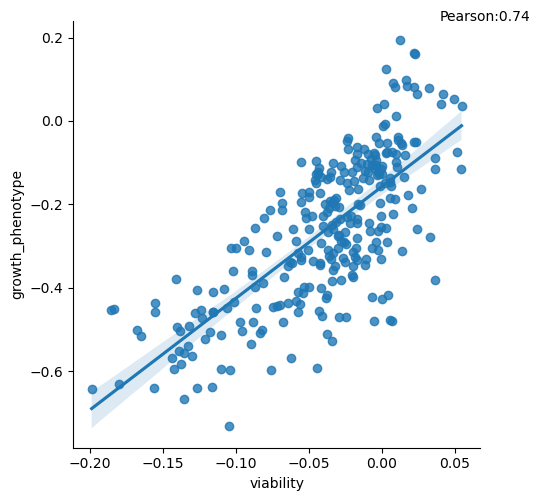

In [28]:
p = sns.lmplot(x="viability", y="growth_phenotype", data=merge_viab_growth)
ax = plt.gca()
ax.text(0.9,1,"Pearson:{:.2f}".format(corr[0,1]),transform=ax.transAxes)

#### Replogle2022